# Titanic (ft.Classification)
---

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

In [2]:
df_train = pd.read_csv("D://Kamie/dataset/titanic/train.csv")
df_test = pd.read_csv("D://Kamie/dataset/titanic/test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# feature간 상관관계 확인

In [4]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

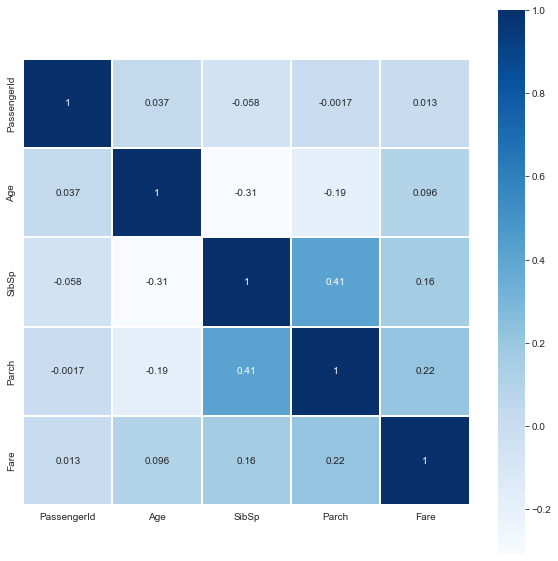

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df_train.corr(), 
            annot=True, 
            # fmt = '.2f', 
            linewidths=0.01, 
            square=True,
            cmap='Blues')

# value_counts()

In [6]:
# 생존자 수 확인
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## 생존 그룹 / 비생존 그룹으로 df 나누기

In [8]:
survived = df_train.loc[df_train['Survived'] == 1].copy()  # copy() 안하면 원본 훼손
dead = df_train.loc[df_train['Survived'] == 0].copy()

## 좌석 등급에 대한 히스토그램

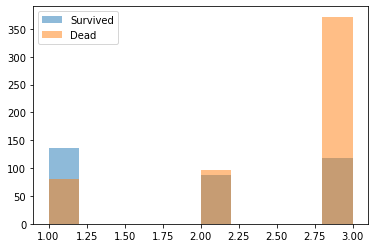

In [9]:
plt.hist(survived["Pclass"], alpha=0.5, label='Survived')   # alpha 투명도
plt.hist(dead["Pclass"], alpha=0.5, label='Dead')
plt.legend(loc='best')  # best 위치에 생성
plt.show()

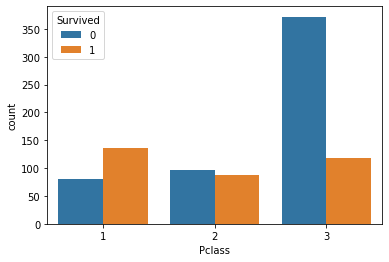

In [10]:
sns.countplot(data=df_train, x="Pclass", hue="Survived")
plt.show()

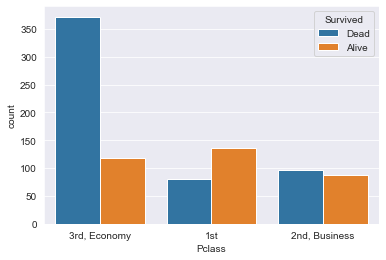

In [11]:
df_train["Pclass"] = df_train["Pclass"].replace(1, "1st").replace(2, "2nd, Business").replace(3, "3rd, Economy")
df_train["Survived"] = df_train["Survived"].replace(1, "Alive").replace(0, "Dead")

sns.set_style(style="darkgrid")  # == set_theme
sns.countplot(data=df_train, x="Pclass", hue="Survived")
plt.show()

# 시각화 함수로 만들기
: 2번 이상 반복할 것 같으면 함수로 만들기

In [16]:
def showCountPlot (feature):
    sns.countplot(data=df_train, x=feature, hue="Survived")
    sns.set_style(style="darkgrid")
    plt.show()

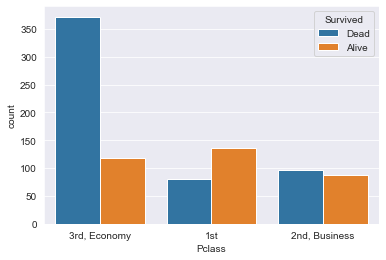

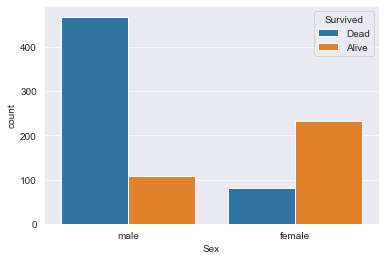

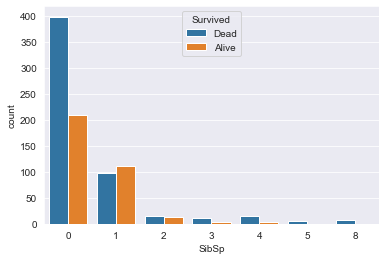

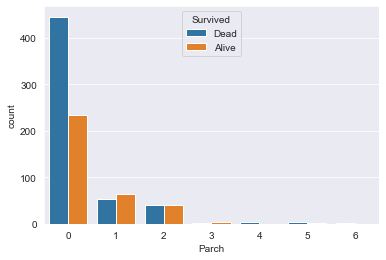

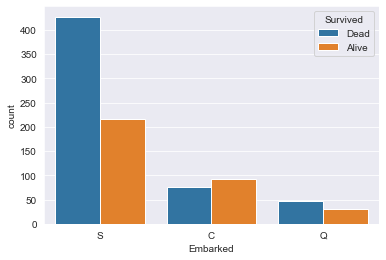

In [19]:
showCountPlot("Pclass")
showCountPlot("Sex")
showCountPlot("SibSp")
showCountPlot("Parch")
showCountPlot("Embarked")

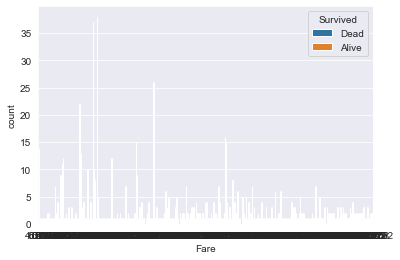

In [20]:
showCountPlot("Fare")

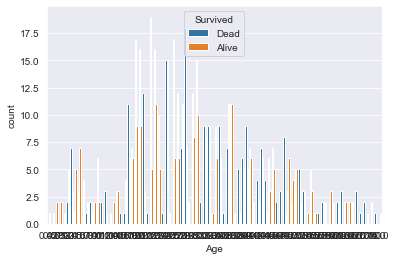

In [18]:
showCountPlot("Age")

# Pie plot : 생존자 비율 그릴 때 유리
percentage로 나오기 때문

In [30]:
# 생존 그룹과 비생존 그룹
df_survive = df_train.loc[df_train["Survived"] == "Alive"]
df_dead = df_train.loc[df_train["Survived"] == "Dead"]

In [70]:
def showPiePlot(feature):  # show_survive_rate
    # 열의 생존자와 사망자 수를 카운트
    sur_info = df_survive[feature].value_counts(sort=False)
    print(sur_info)
    
    # 전체 생존자 수 대비 category 별 생존 비율
    category = sur_info.index
    
    plt.figure(figsize=(7, 7))
    plt.title(f"Survival Rate in Total ({feature})")
    plt.pie(sur_info, labels=category, autopct="%0.1f%%")  # %% 두 번 적어줘야 % 하나 출력됨
    # plt.rc('font', size=20)        # 기본 폰트 크기
    plt.show()

1st              136
3rd, Economy     119
2nd, Business     87
Name: Pclass, dtype: int64


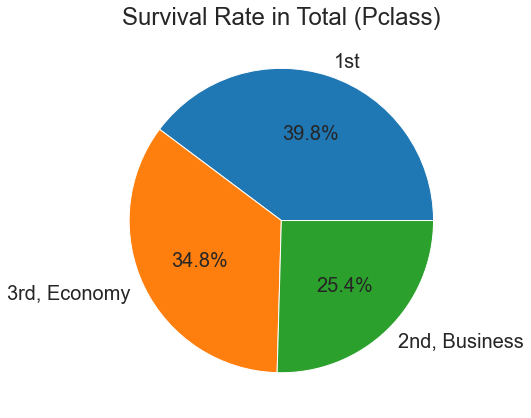

In [71]:
showPiePlot("Pclass")

female    233
male      109
Name: Sex, dtype: int64


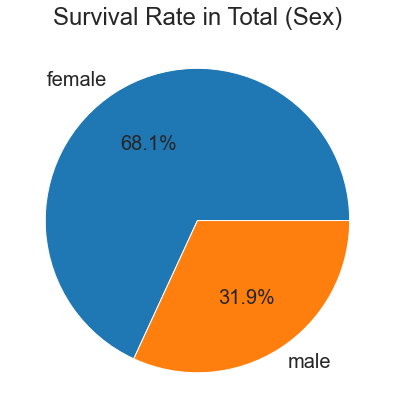

In [72]:
showPiePlot("Sex")

1    112
0    210
4      3
3      4
2     13
Name: SibSp, dtype: int64


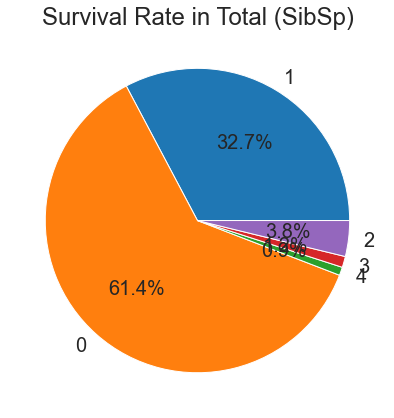

In [73]:
showPiePlot("SibSp")

0    233
2     40
1     65
5      1
3      3
Name: Parch, dtype: int64


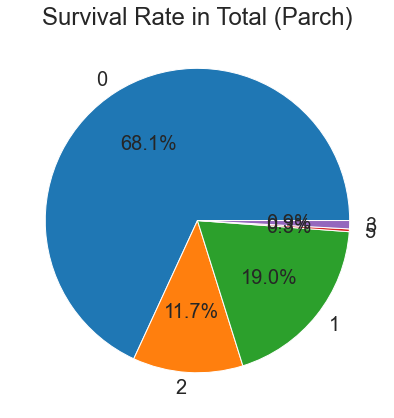

In [74]:
showPiePlot("Parch")

C     93
S    217
Q     30
Name: Embarked, dtype: int64


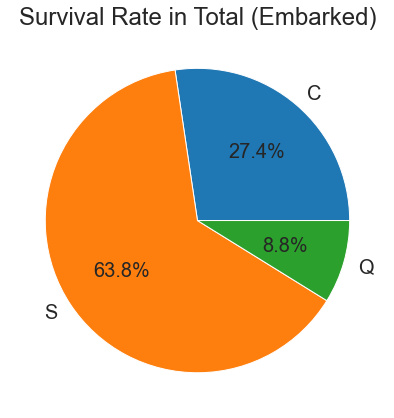

In [75]:
showPiePlot("Embarked")

C:\Users\AI-00\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


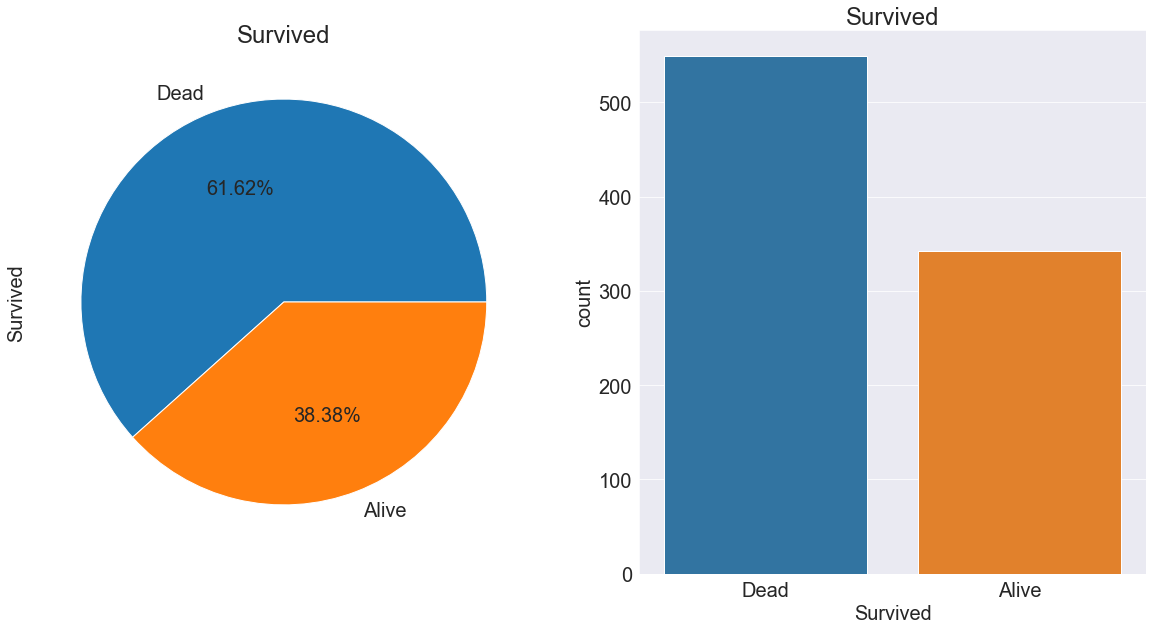

In [76]:
# 파이플롯 / 카운터 플롯으로 시각화
# 그림은 1행 2열
fig, ax = plt.subplots(1,2, figsize=(20,10))

df_train["Survived"].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title("Survived")

sns.countplot("Survived", data=df_train,ax=ax[1])
ax[1].set_title("Survived")

plt.rc('font', size=20)        # 기본 폰트 크기
plt.show()

---
# << 과제  >>
그룹별 생존 비율로 코드 만들어보기
1. 성별에 따른 생존 비율
    - 남성 생존자 수 / 남성 승객 수
    - 여성 생존자 수 / 여성 승객 수
2. 좌석등급에 따른 생존 비율
    - 1등급 생존자 수 / 1등급 승객 수   
    - 2등급 생존자 수 / 2등급 승객 수    
    - 3등급 생존자 수 / 3등급 승객 수
3. 연령대별 생존률

## >> 1

<AxesSubplot:xlabel='Sex', ylabel='Probability'>

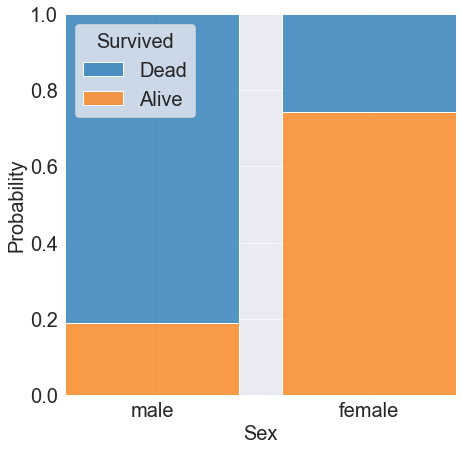

In [85]:
plt.figure(figsize=(7, 7))
sns.histplot(df_train, x="Sex", hue="Survived", stat="probability", multiple="fill", shrink=.8)

## >> 2

In [91]:
# 생존 그룹과 비생존 그룹
df_survive = df_train.loc[df_train["Survived"] == "Alive"]
df_dead = df_train.loc[df_train["Survived"] == "Dead"]

In [ ]:
def showPiePlot_Groupby(feature):
    # 열의 생존자와 사망자 수를 카운트
    sur_info = df_survive[feature].value_counts(sort=False)
    print(sur_info)
    
    # 전체 생존자 수 대비 category 별 생존 비율
    category = sur_info.index
    
    plt.figure(figsize=(7, 7))
    plt.title(f"Survival Rate in Total ({feature})")
    plt.pie(sur_info, labels=category, autopct="%0.1f%%")  # %% 두 번 적어줘야 % 하나 출력됨
    # plt.rc('font', size=20)        # 기본 폰트 크기
    plt.show()

In [127]:
sur_info = df_survive["Pclass"].value_counts(sort=False)
sur_info

1st              136
3rd, Economy     119
2nd, Business     87
Name: Pclass, dtype: int64

In [128]:
category = sur_info.index
category

Index(['1st', '3rd, Economy', '2nd, Business'], dtype='object')

In [96]:
df_survive["Pclass"].value_counts(sort=False)

1st              136
3rd, Economy     119
2nd, Business     87
Name: Pclass, dtype: int64

In [102]:
df_train["Survived"].groupby(df_survive["Pclass"]).value_counts(sort=False)

Pclass         Survived
1st            Alive       136
2nd, Business  Alive        87
3rd, Economy   Alive       119
Name: Survived, dtype: int64

In [115]:
uni = df_survive["Pclass"].unique()


In [117]:
df_survive["Pclass"].value_counts()

1st              136
3rd, Economy     119
2nd, Business     87
Name: Pclass, dtype: int64

In [131]:
uni = df_survive["Pclass"].unique()
for i in uni:
    per_info = df_train["Survived"].loc[df_train["Pclass"]==i].value_counts()  # 그 클래스의 생존수
    print(per_info)

Alive    136
Dead      80
Name: Survived, dtype: int64
Dead     372
Alive    119
Name: Survived, dtype: int64
Dead     97
Alive    87
Name: Survived, dtype: int64


In [133]:
uni = df_survive["Pclass"].unique()
uni

array(['1st', '3rd, Economy', '2nd, Business'], dtype=object)

# 숙제완

In [140]:
def tmp(feature):
    uni = df_survive[feature].unique()
    for i in uni:
        per_info = df_train["Survived"].loc[df_train[feature]==i].value_counts()  # 그 클래스의 생존수
        plt.figure(figsize=(7, 7))
        plt.pie(per_info, labels=per_info.index, autopct="%0.1f%%")  # %% 두 번 적어줘야 % 하나 출력됨
        plt.title(i)
        plt.title(f"Survial rate of {feature} : {i}")
        plt.show()

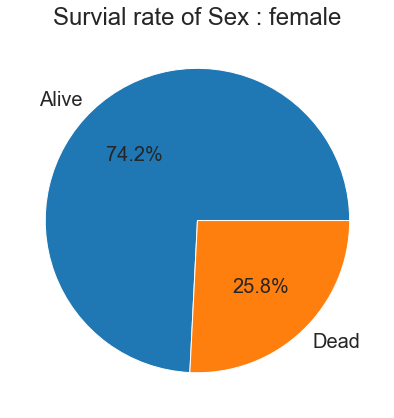

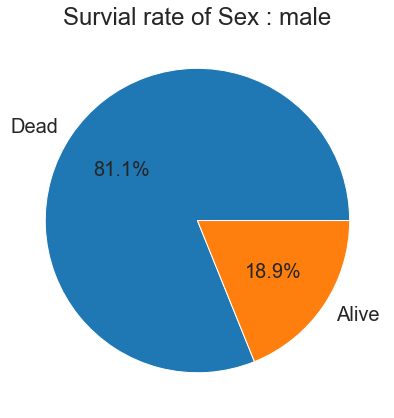

In [141]:
tmp("Sex")

### 교수님 코드

In [94]:
# 각 칼럼의 인원수 대비 생존자 비율
def show_group_rate(feature):
    sur_info = df_survive[feature].value_counts(sort=False)
    dead_info = df_dead[feature].value_counts(sort=False)
    
    fig = plt.figure()
    plt.title("Survival rete of " + feature)
    
    for i, index in enumerate(sur_info.index):
        
        plt.figure(figsize=(7, 7))
        
        fig.add_subplot(1, len(sur_info), i+1)
        plt.pie([sur_info[index], dead_info[index]], labels=["Survived", "Dead"], autopct="%0.1f%%")
        plt.title("Survial rate of " + feature)
        
    plt.show()

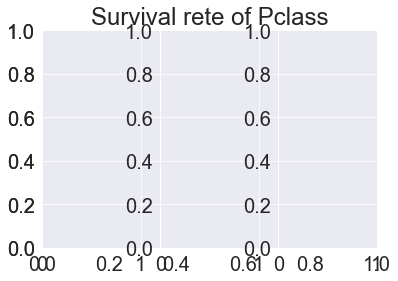

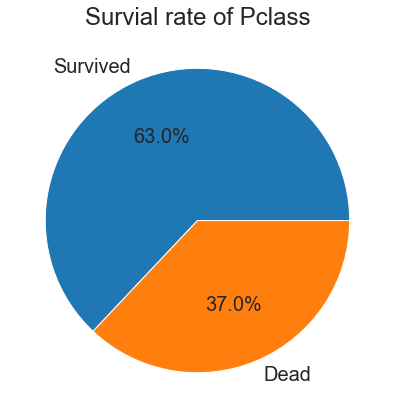

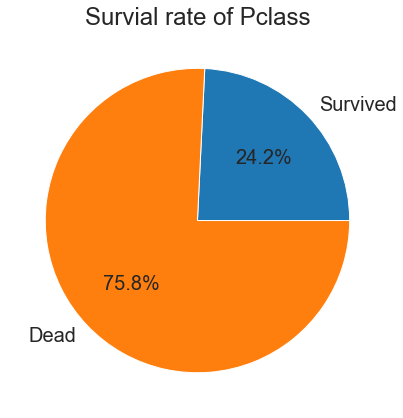

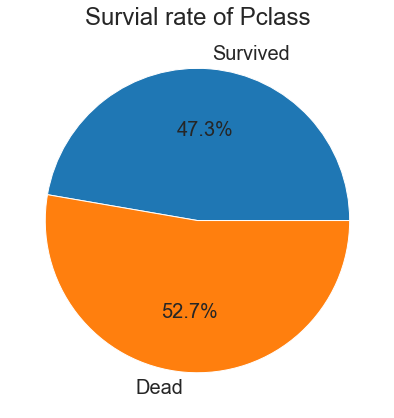

In [95]:
show_group_rate("Pclass")